In [1]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [2]:
h2o.init(nthreads=-1, max_mem_size='4g')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_191"; OpenJDK Runtime Environment (build 1.8.0_191-8u191-b12-0ubuntu0.16.04.1-b12); OpenJDK 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /usr/local/lib/python3.5/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl62m3uf1
  JVM stdout: /tmp/tmpl62m3uf1/h2o_antebilic_started_from_python.out
  JVM stderr: /tmp/tmpl62m3uf1/h2o_antebilic_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Singapore
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_antebilic_7ye5gb
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [3]:
my_data = h2o.import_file('Census_income.csv')
my_data.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,over_50k
39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False
49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,False
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,True
31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,True
42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,True


In [4]:
my_data.describe()

Rows:32561
Cols:13




,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,over_50k
type,int,enum,int,enum,enum,enum,enum,enum,int,int,int,enum,enum
mins,17.0,,1.0,,,,,,0.0,0.0,1.0,,
mean,38.581646755320776,,10.0806793403151,,,,,,1077.6488437087312,87.303829734959,40.43745585209298,,
maxs,90.0,,16.0,,,,,,99999.0,4356.0,99.0,,
sigma,13.64043255358134,,2.5727203320673877,,,,,,7385.29208484034,402.9602186489997,12.347428681731843,,
zeros,0,,0,,,,,,29849,31042,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,False
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,False
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,False


In [5]:
train, test = my_data.split_frame([0.8], seed=42)
train.shape, test.shape

((26122, 13), (6439, 13))

In [6]:
y = 'over_50k'
x = my_data.columns
x.remove(y)
x

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

# Spot-check Classification
To quickly determine which type or class of algorithms is good at picking out the structure in the dataset.
This is the 1st step in the model tuning process.

In [7]:
gl0 = H2OGeneralizedLinearEstimator(model_id='gl0', family="binomial", seed=42)
gl0.train(x=x, y=y, training_frame=train)
gl0_perf = gl0.model_performance(test)
print("GeneralizedLinear Max Accuracy/f1/AUC: {:{f}} {:{f}} {:{f}}".
      format(gl0_perf.accuracy()[0][1], gl0_perf.F1()[0][1], gl0_perf.auc(), f='.3f'))

glm Model Build progress: |███████████████████████████████████████████████| 100%
GeneralizedLinear Max Accuracy/f1/AUC: 0.855 0.696 0.911


In [8]:
my_models = {'nb0': "NaiveBayes", 'dl0': "DeepLearning", 'rf0': "RandomForest",
             'gb0': "GradientBoosting", 'xg0': "XGBoost"}

for m, m_id in my_models.items():
    exec(m + ' = H2O' + m_id + 'Estimator(model_id=m_id, seed=42)')
    exec(m + '.train(x=x, y=y, training_frame=train)')
    exec('mp =' + m + '.model_performance(test)')
    acc = mp.accuracy()[0][1]
    f1 = mp.F1()[0][1]
    auc = mp.auc()
    exec('print("' + m_id + ' Accuracy/f1/AUC: {:{f}} {:{f}} {:{f}}"' + '.format(acc, f1, auc, f=".3f"))')

xgboost Model Build progress: |███████████████████████████████████████████| 100%
XGBoost Accuracy/f1/AUC: 0.874 0.728 0.931
drf Model Build progress: |███████████████████████████████████████████████| 100%
RandomForest Accuracy/f1/AUC: 0.868 0.717 0.919
deeplearning Model Build progress: |██████████████████████████████████████| 100%
DeepLearning Accuracy/f1/AUC: 0.859 0.705 0.917
naivebayes Model Build progress: |████████████████████████████████████████| 100%
NaiveBayes Accuracy/f1/AUC: 0.832 0.655 0.873
gbm Model Build progress: |███████████████████████████████████████████████| 100%
GradientBoosting Accuracy/f1/AUC: 0.873 0.723 0.927


In [9]:
# k-fold cross validation on the full dataset:
nfolds = 5

xg_cv = H2OXGBoostEstimator(nfolds=nfolds, model_id='xg_cv', seed=42)
xg_cv.train(x=x, y=y, training_frame=my_data)

xg_cv_summ = xg_cv.cross_validation_metrics_summary()
df_xgcv = xg_cv_summ.as_data_frame()
df_xgcv.set_index('', drop=True).loc[['accuracy', 'auc', 'f1', 'precision', 'recall'], 'mean']

xgboost Model Build progress: |███████████████████████████████████████████| 100%



accuracy     0.86589146
auc          0.92872906
f1            0.7333357
precision    0.70486593
recall        0.7651271
Name: mean, dtype: object

In [10]:
# Random grid search for optimal XGBoost hyperparameters:
from h2o.grid.grid_search import H2OGridSearch

hyper_params = {'ntrees': [10, 50, 100], 'learn_rate': [0.01, 0.03, 0.5], 'max_depth': [3, 5, 7, 9],
                'sample_rate': [0.7, 0.8, 0.9, 1.0], 'col_sample_rate': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 42}

xg1 = H2OXGBoostEstimator(nfolds=nfolds, seed=42)
xgrid1 = H2OGridSearch(model=xg1, hyper_params=hyper_params, search_criteria=search_criteria, grid_id='xgrid1')
xgrid1.train(x=x, y=y, training_frame=my_data)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [11]:
# xgrid1.models

# performance on the holdout (xval=True) data
for m in xgrid1.model_ids:
    print('\n', m)
    for score in ('accuracy', 'F1', 'auc'):
        print(score + ':', eval('h2o.get_model(m).model_performance(xval=True).' + score + '()'))


 xgrid1_model_3
accuracy: [[0.5298826480523134, 0.8729461625871441]]
F1: [[0.384617087656054, 0.7307431808386184]]
auc: 0.9277328087073631

 xgrid1_model_5
accuracy: [[0.5125697559780544, 0.8715027179754922]]
F1: [[0.36461265075881527, 0.7270010161994143]]
auc: 0.9268826905210311

 xgrid1_model_6
accuracy: [[0.5479360943616822, 0.8688308098645618]]
F1: [[0.389325744830645, 0.7220920192426299]]
auc: 0.9237036494750644

 xgrid1_model_7
accuracy: [[0.4637057627692367, 0.8685544055772243]]
F1: [[0.39244737432283516, 0.7223257547521431]]
auc: 0.9222170054385938

 xgrid1_model_1
accuracy: [[0.5339137269900396, 0.8658210742913302]]
F1: [[0.3702498191595078, 0.7149260964380907]]
auc: 0.9199239491487158

 xgrid1_model_4
accuracy: [[0.5189726027575406, 0.8569761370965265]]
F1: [[0.31161622738091194, 0.6936967249887842]]
auc: 0.9105591191682259

 xgrid1_model_8
accuracy: [[0.4633984832387221, 0.8643162065047142]]
F1: [[0.40594118407794405, 0.7111898435193387]]
auc: 0.9174061696071888

 xgrid1_mo

In [12]:
# AUC of cross-validated holdout predictions
xgrid1.auc(xval=True)

{'xgrid1_model_1': 0.9199239491487158,
 'xgrid1_model_10': 0.9063068076524153,
 'xgrid1_model_2': 0.8903806267487017,
 'xgrid1_model_3': 0.9277328087073631,
 'xgrid1_model_4': 0.9105591191682259,
 'xgrid1_model_5': 0.9268826905210311,
 'xgrid1_model_6': 0.9237036494750644,
 'xgrid1_model_7': 0.9222170054385938,
 'xgrid1_model_8': 0.9174061696071888,
 'xgrid1_model_9': 0.8897690351810189}

In [13]:
# threshold-max.accuracy:
xgrid1.accuracy(xval=True)

{'xgrid1_model_1': [[0.5339137269900396, 0.8658210742913302]],
 'xgrid1_model_10': [[0.46862025907699095, 0.8558398083596941]],
 'xgrid1_model_2': [[0.47249929528487356, 0.8497282024507847]],
 'xgrid1_model_3': [[0.5298826480523134, 0.8729461625871441]],
 'xgrid1_model_4': [[0.5189726027575406, 0.8569761370965265]],
 'xgrid1_model_5': [[0.5125697559780544, 0.8715027179754922]],
 'xgrid1_model_6': [[0.5479360943616822, 0.8688308098645618]],
 'xgrid1_model_7': [[0.4637057627692367, 0.8685544055772243]],
 'xgrid1_model_8': [[0.4633984832387221, 0.8643162065047142]],
 'xgrid1_model_9': [[0.48949439745200307, 0.8506188384877614]]}

In [14]:
xg3 = xgrid1.models[3]
# 'actual' parameters below:
xg3.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'col_sample_rate': {'actual': 0.4, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 1.0, 'default': 1.0},
 'colsample_bylevel': {'actual': 1.0, 'default': 1.0},
 'colsample_bytree': {'actual': 1.0, 'default': 1.0},
 'distribution': {'actual': 'AUTO', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gamma': {'actual': 0.0, 'default': 0.0},
 'gpu_id': {'actual': 0, 'default': 0},
 'grow_policy': {'actual': 'depthwise', 'default': 'depthwise'},
 'ignore_const_cols': {'actual': True, 'default': True},
 'ignored_columns': {'actual': None, 'default': None},
 'keep_cross_validati

# Stacked Ensembles

In [15]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [16]:
my_glm = H2OGeneralizedLinearEstimator(family="binomial", seed=42, nfolds=nfolds, fold_assignment='modulo',
                                       keep_cross_validation_predictions=True)
my_glm.train(x=x, y=y, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [17]:
my_gbm = H2OGradientBoostingEstimator(distribution='bernoulli', ntrees=10, max_depth=3, min_rows=2, learn_rate=0.2,
                                     nfolds=nfolds, fold_assignment='modulo', keep_cross_validation_predictions=True, seed=42)
my_gbm.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [18]:
my_rf = H2ORandomForestEstimator(ntrees=10, nfolds=nfolds, fold_assignment='modulo',
                                 keep_cross_validation_predictions=True, seed=42)
my_rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [19]:
# Train a stacked ensemble using the GLM, GBM and RF above
ensemble = H2OStackedEnsembleEstimator(model_id='my_ensemble_binomial', base_models=[my_glm, my_gbm, my_rf])
ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [20]:
for m in ('glm', 'gbm', 'rf'):
    exec('perf_' + m + '_test = my_' + m + '.model_performance(test)')

perf_stack_test = ensemble.model_performance(test)

print("Test AUC scores GLM: {:.3f}, GBM: {:.3f}, RF: {:.3f}, Ensemble: {:.3f}".format(perf_glm_test.auc(),
                                                                                      perf_gbm_test.auc(),
                                                                                      perf_rf_test.auc(),
                                                                                      perf_stack_test.auc()))

Test AUC scores GLM: 0.911, GBM: 0.910, RF: 0.914, Ensemble: 0.920


In [21]:
# Alternatively, stacking models from a grid search:
xgbm = H2OXGBoostEstimator(seed=42, nfolds=nfolds, fold_assignment='Modulo', keep_cross_validation_predictions=True)

# limit the grid from above to 3 models only:
search_criteria['max_models'] = 3
hyper_params['ntrees'] = 10

my_grid = H2OGridSearch(model=xgbm, hyper_params=hyper_params, search_criteria=search_criteria, grid_id='gxgbm')
my_grid.train(x=x, y=y, training_frame=train)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [22]:
perf_stack_ens = ensemble.model_performance(test)
print('Test accuracy at the base models {:.3f} {:.3f} {:.3f} :'.format(
        *[h2o.get_model(m).model_performance(test).auc() for m in my_grid.model_ids]))
print("Test accuracy of the ensemble: {:.3f}".format(perf_stack_ens.auc()))

Test accuracy at the base models 0.916 0.905 0.915 :
Test accuracy of the ensemble: 0.920


In [24]:
# Ensemble Stacking with scikit-learn
from numpy import ravel
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [25]:
X_train = train.as_data_frame()
X_train, y_train = X_train[x], X_train[y]
X_test = test.as_data_frame()
X_test, y_test = X_test[x], X_test[y]

lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
X_train['Sex'] = lb.fit_transform(X_train['Sex'])
X_test['Sex'] = lb.fit_transform(X_test['Sex'])

le = LabelEncoder()

for c in ('Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Country'):
    X_train[c]  = le.fit_transform(X_train[c])
    X_test[c]  = le.fit_transform(X_test[c])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26122, 12), (26122, 1), (6439, 12), (6439, 1))

In [26]:
models = [KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
          RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10),
          XGBClassifier(random_state=42, n_jobs=-1, n_estimators=10)]

S_train, S_test = stacking(models, X_train, y_train.ravel(), X_test, regression=False, mode='oof_pred_bag',
                           needs_proba=False, save_dir=None,metric=accuracy_score, n_folds=nfolds, 
                           stratified=True, shuffle=True, random_state=42, verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.84366628]
    fold  1:  [0.83441807]
    fold  2:  [0.84877489]
    fold  3:  [0.84456355]
    fold  4:  [0.83460949]
    ----
    MEAN:     [0.84120646] + [0.00573069]
    FULL:     [0.84120665]

model  1:     [RandomForestClassifier]
    fold  0:  [0.84194413]
    fold  1:  [0.84226646]
    fold  2:  [0.84858346]
    fold  3:  [0.84628637]
    fold  4:  [0.83939510]
    ----
    MEAN:     [0.84369510] + [0.00329265]
    FULL:     [0.84369497]

model  2:     [XGBClassifier]
    fold  0:  [0.83888251]
    fold  1:  [0.83518377]
    fold  2:  [0.84628637]
    fold  3:  [0.84475498]
    fold  4:  [0.84111792]
    ----
    MEAN:     [0.84124511] + [0.00400178]
    FULL:     [0.84124493]



In [27]:
model = XGBClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3)

model = model.fit(S_train, y_train.ravel())

y_pred = model.predict(S_test)

print('Final prediction score: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Final prediction score: 0.854


# AutoML with H2O

In [28]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=60, seed=42)
# aml.train(x=x, y=y, training_frame=train,leaderboard_frame=test)
aml.train(x=x, y=y, training_frame=my_data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [29]:
# aml.leader
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190117_171330,0.917802,0.309283,0.182599,0.309441,0.0957535
StackedEnsemble_BestOfFamily_AutoML_20190117_171330,0.917802,0.309283,0.182599,0.309441,0.0957535
DRF_1_AutoML_20190117_171330,0.914563,0.328121,0.179069,0.309397,0.0957264
XRT_1_AutoML_20190117_171330,0.911844,0.3206,0.183837,0.310705,0.0965376
GLM_grid_1_AutoML_20190117_171330_model_1,0.906741,0.319126,0.188129,0.319568,0.102123


In [30]:
# convert to pandas DataFrame:
models = list(aml.leaderboard.as_data_frame()['model_id'])
stack_ens = h2o.get_model(*[m for m in models if  "AllModels" in m])   # using * or [0] to remove the [] brackets
metalearner = h2o.get_model(stack_ens.metalearner()['name'])

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


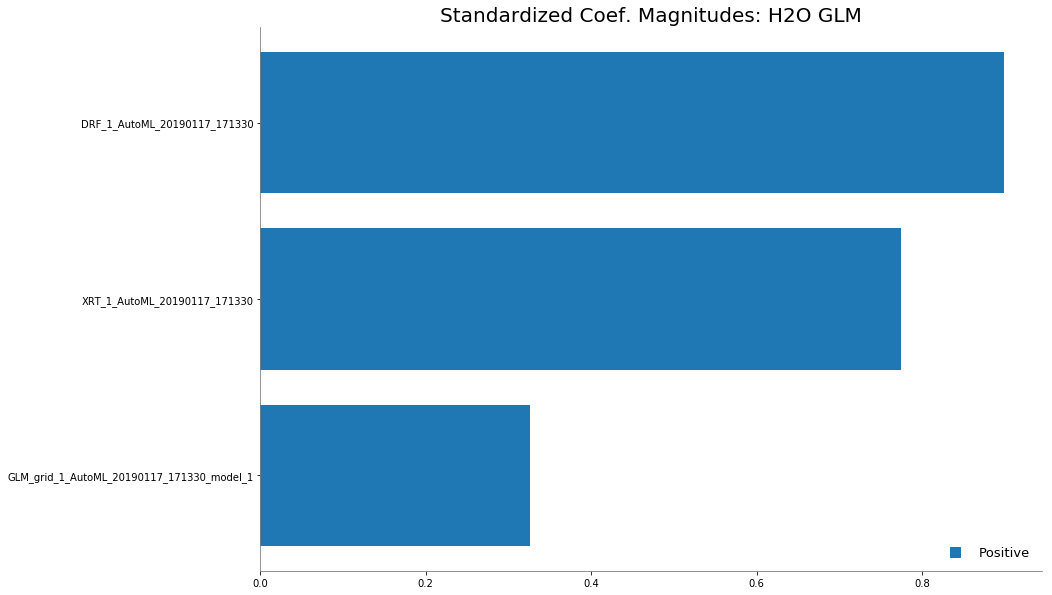

In [31]:
%matplotlib inline
# contributions from base learner models:
metalearner.std_coef_plot()

In [32]:
# aml.leader.download_mojo(path = "./")    # to save as MOJO-format production model
# h2o.save_model(aml.leader, path = './')

In [33]:
h2o.cluster().shutdown()

H2O session _sid_be14 closed.
